In [ ]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
pyvista._wrappers['vtkPolyData'] = pyvista.PolyData

Clipping with a Surface {#clip_with_surface_example}
=======================

Clip any PyVista dataset by a `pyvista.PolyData`{.interpreted-text
role="class"} surface mesh using the
`pyvista.DataSetFilters.clip_surface`{.interpreted-text role="func"}
filter.

Note that we first demonstrate how the clipping is performed by
computing an implicit distance and thresholding the mesh. This
thresholding is one approach to clip by a surface, and preserve the
original geometry of the given mesh, but many folks leverage the
`clip_surface` filter to triangulate/tessellate the mesh geometries
along the clip.


In [1]:
# sphinx_gallery_thumbnail_number = 4
import pyvista as pv
from pyvista import examples
import numpy as np

/home/kajetan/.conda/envs/pyvista-mpl/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


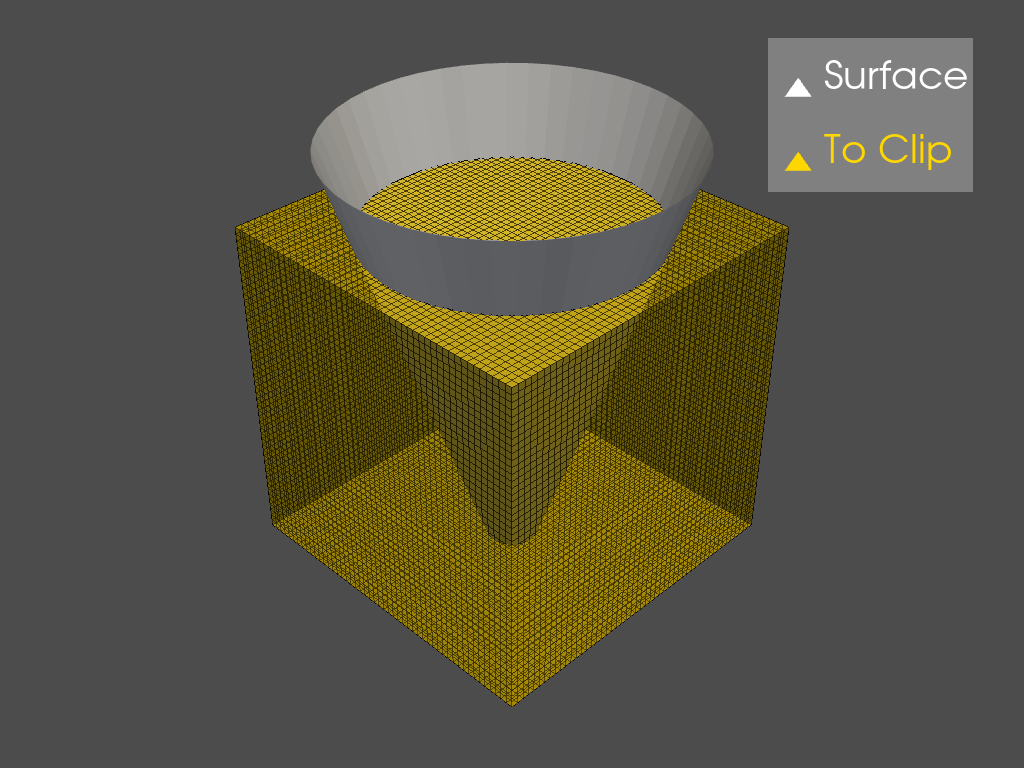

In [2]:
surface = pv.Cone(direction=(0,0,-1), height=3.0, radius=1,
                  resolution=50, capping=False)

# Make a gridded dataset
n = 51
xx = yy = zz = 1 - np.linspace(0, n, n) * 2 / (n-1)
dataset = pv.RectilinearGrid(xx, yy, zz)

# Preview the problem
p = pv.Plotter()
p.add_mesh(surface, color='w', label='Surface')
p.add_mesh(dataset, color='gold', show_edges=True,
           opacity=0.75, label='To Clip')
p.add_legend()
p.show()

Take a look at the implicit function used to perform the surface
clipping by using the
`pyvista.DataSetFilters.compute_implicit_distance`{.interpreted-text
role="func"} filter. The clipping operation field is performed where the
`implicit_distance` field is zero and the `invert` flag controls which
sides of zero to preserve.


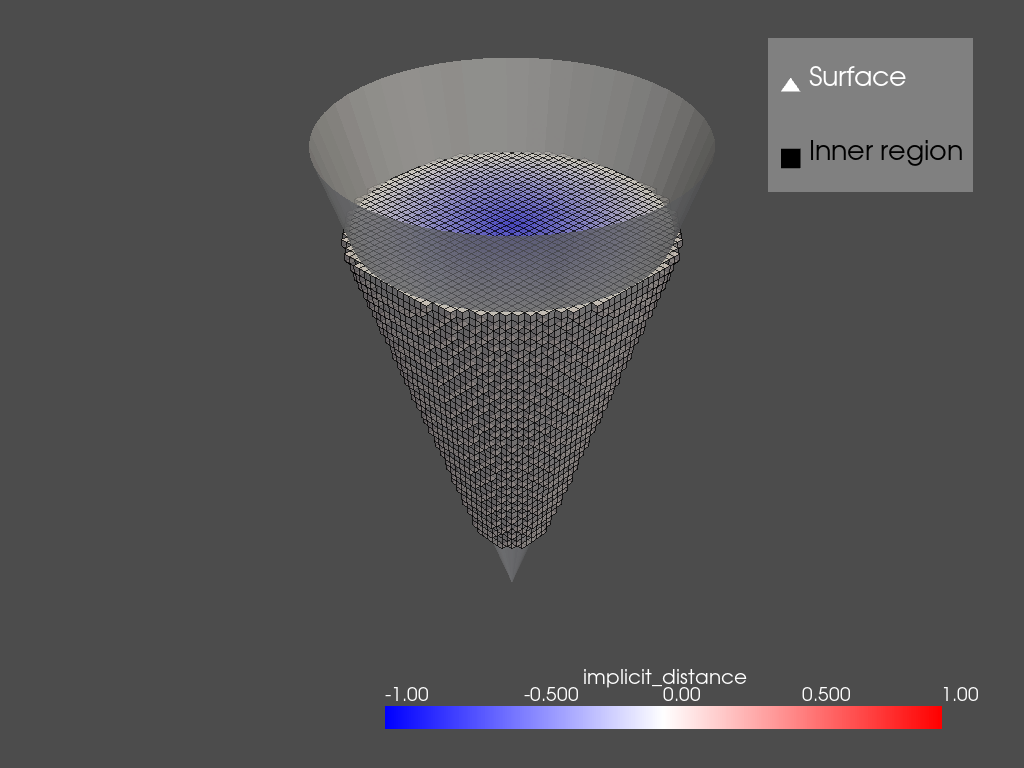

In [3]:
dataset.compute_implicit_distance(surface, inplace=True)

inner = dataset.threshold(0.0, scalars="implicit_distance", invert=True)
outer = dataset.threshold(0.0, scalars="implicit_distance", invert=False)

p = pv.Plotter()
p.add_mesh(surface, color='w', label='Surface', opacity=0.75)
p.add_mesh(inner, scalars="implicit_distance", show_edges=True,
           opacity=0.75, label='Inner region', clim=[-1,1], cmap="bwr")
p.add_legend()
p.enable_depth_peeling()
p.show()

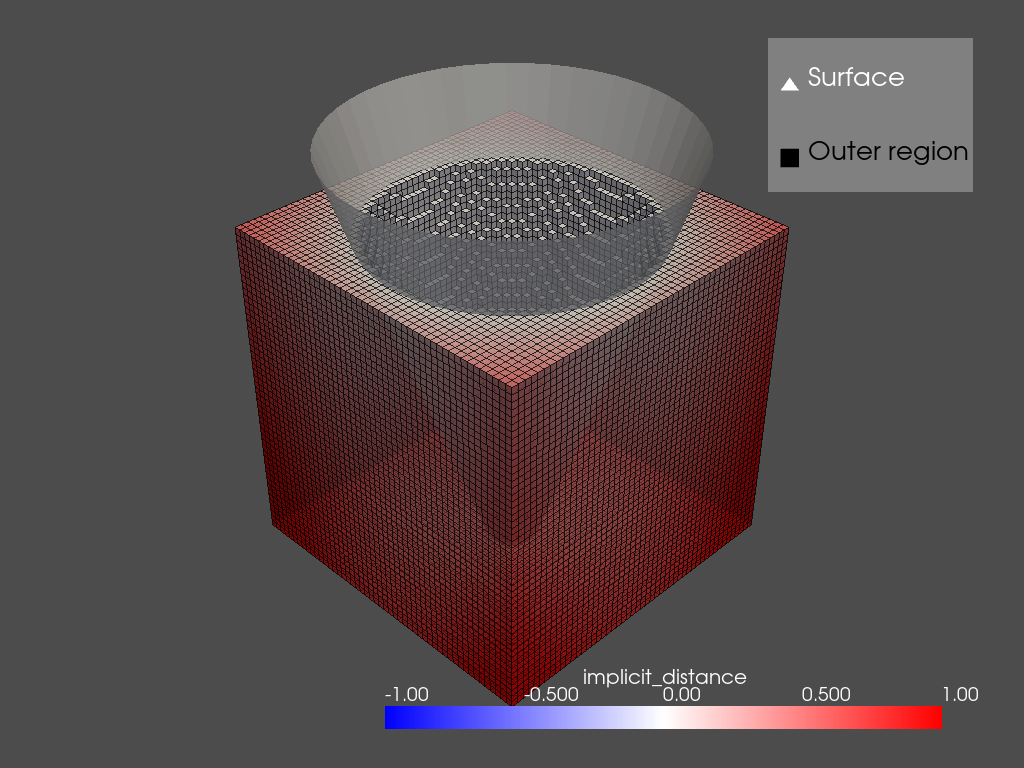

In [5]:
p = pv.Plotter()
p.add_mesh(surface, color='w', label='Surface', opacity=0.75)
p.add_mesh(outer, scalars="implicit_distance", show_edges=True,
           opacity=0.75, label='Outer region', clim=[-1,1], cmap="bwr")
p.add_legend()
p.enable_depth_peeling()
p.show()

Clip the rectilinear grid dataset using the
`pyvista.PolyData`{.interpreted-text role="class"} surface mesh via the
`pyvista.DataSetFilters.clip_surface`{.interpreted-text role="func"}
filter. This will triangulate/tessellate the mesh geometries along the
clip.


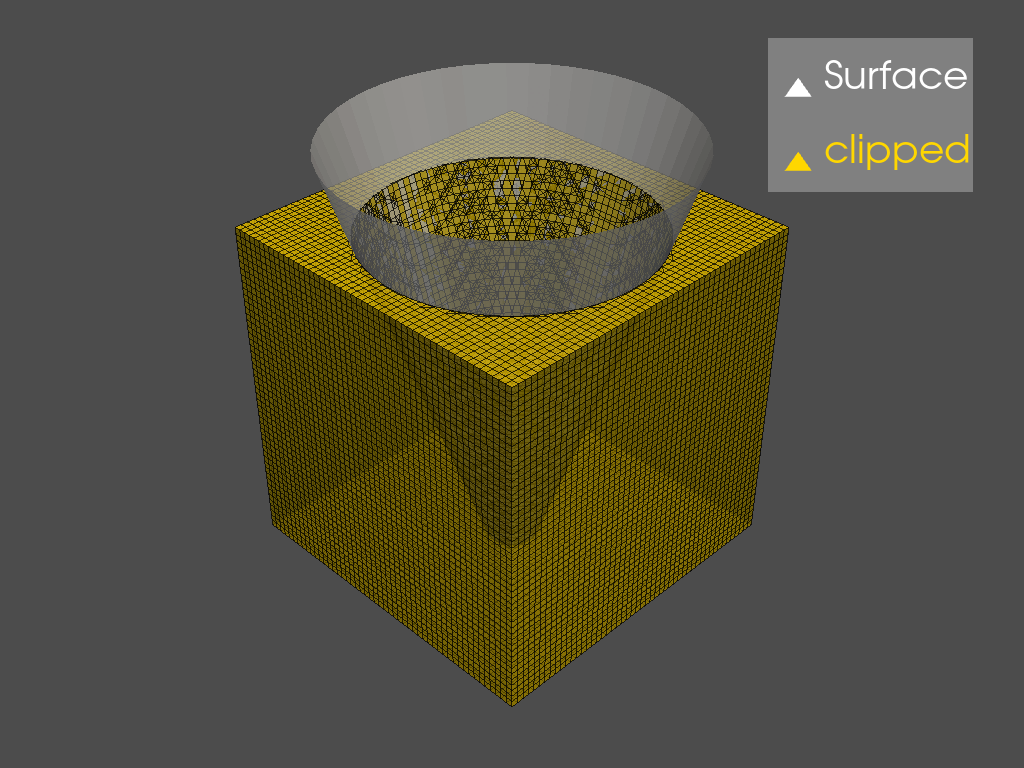

In [4]:
clipped = dataset.clip_surface(surface, invert=False)

# Visualize the results
p = pv.Plotter()
p.add_mesh(surface, color='w', opacity=0.75, label='Surface')
p.add_mesh(clipped, color='gold', show_edges=True, label="clipped", opacity=0.75)
p.add_legend()
p.enable_depth_peeling()
p.show()

Here is another example of clipping a mesh by a surface. This time,
we\'ll generate a `pyvista.UniformGrid`{.interpreted-text role="class"}
around a topography surface and then clip that grid using the surface to
create a closed 3D model of the surface


In [ ]:
surface = examples.load_random_hills()

# Create a grid around that surface
grid = pv.create_grid(surface)

# Clip the grid using the surface
model = grid.clip_surface(surface)

# Compute height and display it
model.elevation().plot()